## Drosophila Examples for Pairwise Alignment

In [155]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
import sys
sys.path.insert(0,'../')
import morpho
import matplotlib.pyplot as plt
import scanpy
import numpy as np
from jupyterthemes import jtplot
jtplot.style(theme="onedork")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [156]:
data_dir='../data/cellbin_h5ad'
slices = [scanpy.read_h5ad(os.path.join(data_dir, "E8-10_b_S{:0>2d}.h5ad".format(index))) for index in range(8,25)]

In [213]:
i = 3
BAS_slices = [slice.copy() for slice in slices]
sliceA = BAS_slices[i]
sliceB = BAS_slices[i + 1]

In [158]:
sliceA

AnnData object with n_obs × n_vars = 1244 × 8992
    obs: 'area', 'slices'
    uns: '__type', 'spatial'
    obsm: 'bbox', 'contour', 'spatial'

In [214]:
spatial_key = 'spatial'
normalize_c = True
normalize_g = False
select_high_exp_genes = False
dtype = 'float64'
device = 'cpu'
verbose = True
dissimilarity = 'kl'

(
    nx,
    type_as,
    new_samples,
    exp_matrices,
    spatial_coords,
    normalize_scale,
    normalize_mean_list,
) = morpho.align_preprocess(
    samples=[sliceA, sliceB],
    spatial_key=spatial_key,
    normalize_c=normalize_c,
    normalize_g=normalize_g,
    select_high_exp_genes=select_high_exp_genes,
    dtype=dtype,
    device=device,
    verbose=verbose,
)
coordsA, coordsB = spatial_coords[1], spatial_coords[0]
X_A, X_B = exp_matrices[1], exp_matrices[0]
KLGeneDistMat = morpho.calc_exp_dissimilarity(X_A=X_A, X_B=X_B, dissimilarity=dissimilarity)
# GeneDistMat = GeneDistMat - nx.min(GeneDistMat, axis=1, keepdims=True)


|-----> Filtered all samples for common genes. There are 8251 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 244.23005937796154.


In [215]:
spatial_key = 'spatial'
normalize_c = True
normalize_g = True
select_high_exp_genes = False
dtype = 'float64'
device = 'cpu'
verbose = True
dissimilarity = 'euc'

(
    nx,
    type_as,
    new_samples,
    exp_matrices,
    spatial_coords,
    normalize_scale,
    normalize_mean_list,
) = morpho.align_preprocess(
    samples=[sliceA, sliceB],
    spatial_key=spatial_key,
    normalize_c=normalize_c,
    normalize_g=normalize_g,
    select_high_exp_genes=select_high_exp_genes,
    dtype=dtype,
    device=device,
    verbose=verbose,
)
coordsA, coordsB = spatial_coords[1], spatial_coords[0]
X_A, X_B = exp_matrices[1], exp_matrices[0]
EucGeneDistMat = morpho.calc_exp_dissimilarity(X_A=X_A, X_B=X_B, dissimilarity=dissimilarity)
# GeneDistMat = GeneDistMat - nx.min(GeneDistMat, axis=1, keepdims=True)


|-----> Filtered all samples for common genes. There are 8251 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 244.23005937796154.
|-----> Gene expression normalization params:
|-----------> Mean: [0.00371747 0.02331869 0.00033795 ... 0.00101386 0.04460967 0.00337952].
|-----------> Scale: 31.692424695631317.


In [225]:
beta2 = 0.1
KLGeneDistMinusMat = KLGeneDistMat - nx.min(KLGeneDistMat, axis=1, keepdims=True)
EucGeneDistMinusMat = EucGeneDistMat - nx.min(EucGeneDistMat, axis=1, keepdims=True)
# KLGeneAssignmentMat = np.exp(-KLGeneDistMinusMat / (2 * beta2))
# EucGeneAssignmentMat = np.exp(-EucGeneDistMinusMat / (2 * beta2))

KLGeneAssignmentMat = np.exp(-KLGeneDistMat / (2 * beta2))
EucGeneAssignmentMat = np.exp(-EucGeneDistMat / (2 * beta2))
# print(GeneAssignmentMat)

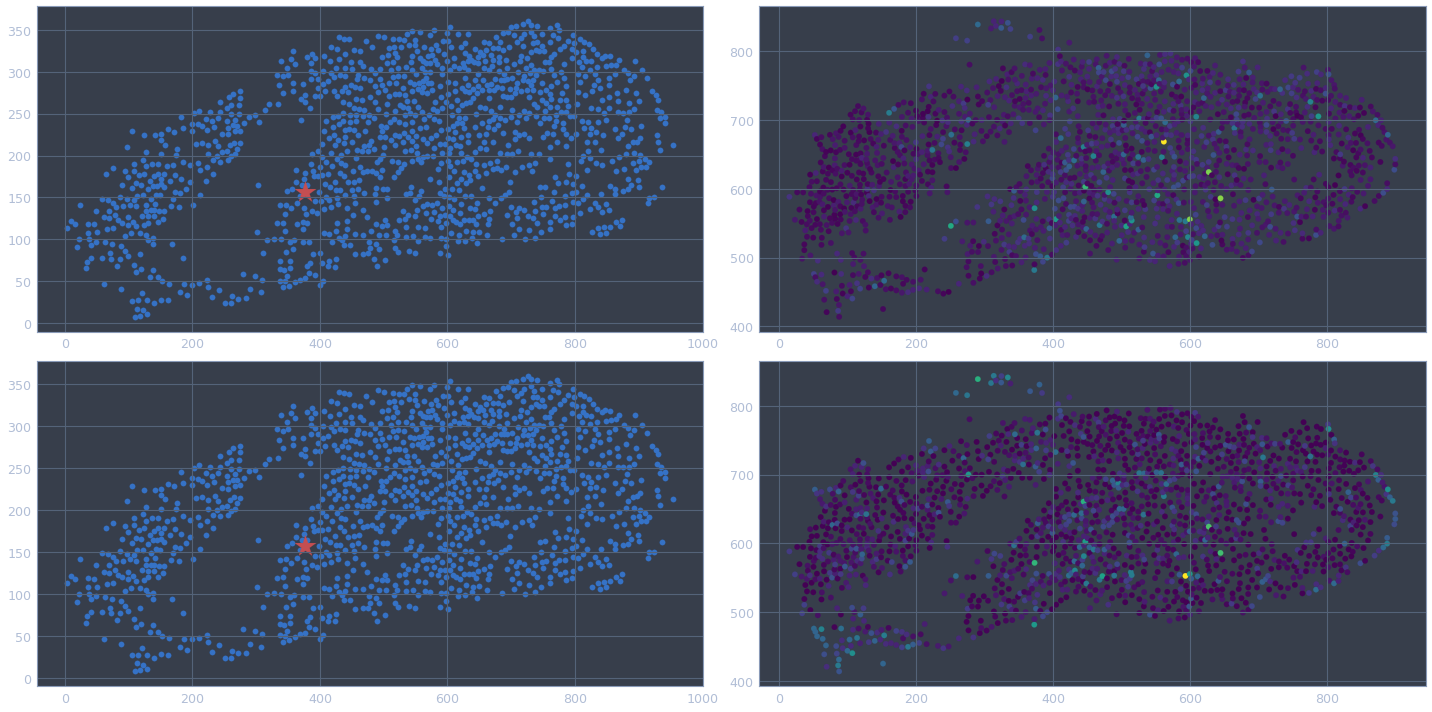

In [226]:
%matplotlib inline
spatial_key = 'spatial'
select_index = 300
fig, axs = plt.subplots(2, 2,figsize=(20,10))
axs[0,0].scatter(sliceA.obsm[spatial_key][:,0],sliceA.obsm[spatial_key][:,1])
axs[0,0].scatter(sliceA.obsm[spatial_key][select_index,0],sliceA.obsm[spatial_key][select_index,1],color='r',marker='*',s=500)
axs[0,1].scatter(sliceB.obsm[spatial_key][:,0],sliceB.obsm[spatial_key][:,1]+np.max(sliceA.obsm[spatial_key][:,1])+50,c=KLGeneAssignmentMat[:,select_index])
axs[1,0].scatter(sliceA.obsm[spatial_key][:,0],sliceA.obsm[spatial_key][:,1])
axs[1,0].scatter(sliceA.obsm[spatial_key][select_index,0],sliceA.obsm[spatial_key][select_index,1],color='r',marker='*',s=500)
axs[1,1].scatter(sliceB.obsm[spatial_key][:,0],sliceB.obsm[spatial_key][:,1]+np.max(sliceA.obsm[spatial_key][:,1])+50,c=EucGeneAssignmentMat[:,select_index])
# for i in range(sliceA.obsm[spatial_key].shape[0]):
#     ax.plot([])
plt.tight_layout()
plt.show()

In [166]:
data_dir='../data/cellbin_3D'
slice_A = scanpy.read_h5ad(os.path.join(data_dir,'E7-8h_cellbin_v1.h5ad'))
slice_B = scanpy.read_h5ad(os.path.join(data_dir,'E8-9h_cellbin_v1.h5ad'))

In [167]:
sub_num = 10000
slice_A_sub = slice_A[np.random.choice(range(slice_A.shape[0]),sub_num)]
slice_B_sub = slice_B[np.random.choice(range(slice_B.shape[0]),sub_num)]

In [203]:
align_model_A, align_model_B, P, _ = morpho.morpho_align_pairwise(
            model_ref=slice_A_sub,
            model=slice_B_sub,
            spatial_key="tdr_spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            normalize_c=True,
            normalize_g=False,
            dissimilarity='kl',
            mode="SN",
            device="2",
            max_iter=100,
            dtype='float64',
            beta2=0.1,
            verbose=True,
            iter_key_added='iter_spatial',
            keep_size=False,
            layer='counts_X',
        )

|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 6615 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 138.2831257160518.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [6.0506s]
gamma: 0.99
beta2: 0.1
sigma2: 0.022810665504620273


In [204]:
spatial_key = 'tdr_spatial'
normalize_c = True
normalize_g = False
select_high_exp_genes = False
dtype = 'float64'
device = 'cpu'
verbose = True
dissimilarity = 'kl'

(
    nx,
    type_as,
    new_samples,
    exp_matrices,
    spatial_coords,
    normalize_scale,
    normalize_mean_list,
) = morpho.align_preprocess(
    samples=[slice_A_sub, slice_B_sub],
    spatial_key=spatial_key,
    normalize_c=normalize_c,
    normalize_g=normalize_g,
    select_high_exp_genes=select_high_exp_genes,
    dtype=dtype,
    device=device,
    verbose=verbose,
)
coordsA, coordsB = spatial_coords[1], spatial_coords[0]
X_A, X_B = exp_matrices[1], exp_matrices[0]
KLGeneDistMat = morpho.calc_exp_dissimilarity(X_A=X_A, X_B=X_B, dissimilarity=dissimilarity)
# GeneDistMat = GeneDistMat - nx.min(GeneDistMat, axis=1, keepdims=True)


|-----> Filtered all samples for common genes. There are 6615 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 138.2831257160518.


In [205]:
beta2 = 0.01
KLGeneDistMinusMat = KLGeneDistMat - nx.min(KLGeneDistMat, axis=1, keepdims=True)
EucGeneDistMinusMat = EucGeneDistMat - nx.min(EucGeneDistMat, axis=1, keepdims=True)
KLGeneAssignmentMat = np.exp(-KLGeneDistMinusMat / (2 * beta2))
EucGeneAssignmentMat = np.exp(-EucGeneDistMinusMat / (2 * beta2))

# KLGeneAssignmentMat = np.exp(-KLGeneDistMat / (2 * beta2))
# EucGeneAssignmentMat = np.exp(-EucGeneDistMat / (2 * beta2))
# print(GeneAssignmentMat)

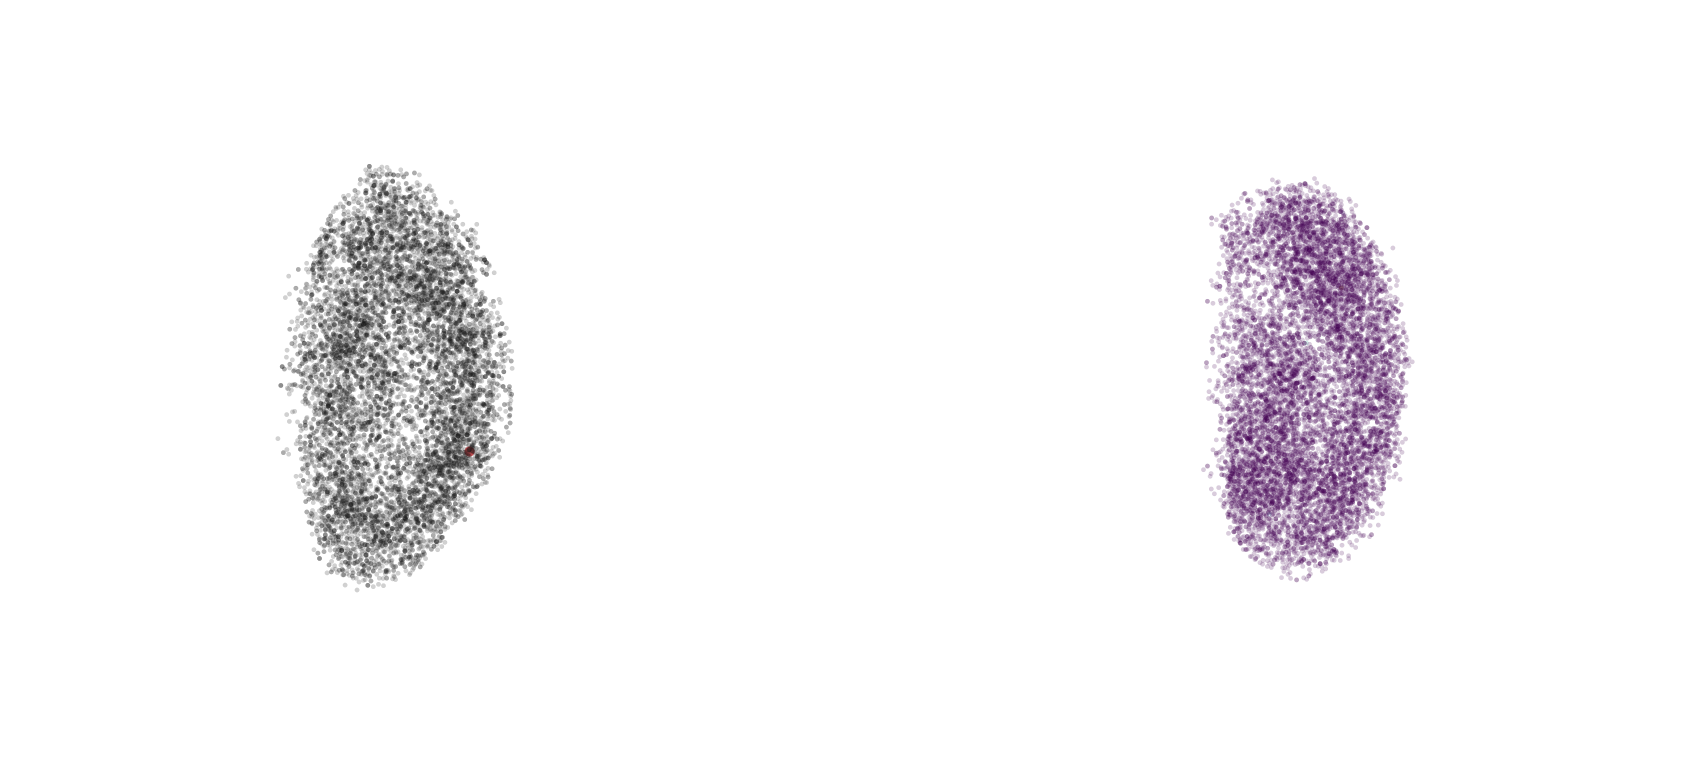

In [206]:
# %matplotlib widget
spatial_key="tdr_spatial"
key_added="align_spatial"
%matplotlib inline
colormap = [
    "#5A2686",
    "#DC143C",
    "#FFDD00",
    "#FFA500",
    "#ADD8E6",
    "#1AAB27",
    "#7F90F0",
    "#CD5C5C",
    "#8B0000",
    "#CD5C5C",
    "#7F90F0",
]
elev = 60
azim = 90
s = 20
xmin, xmax = -250,250
ymin,ymax = -250,250
zmin,zmax = -250,250
select_index = 1000
cell_type_plot=slice_A_sub.obs['Annotation_2_tissue'].cat.categories[0]
cell_type_layer = 'Annotation_2_tissue'
fig = plt.figure(figsize=(30,30),facecolor='white')
ax = fig.add_subplot(1,2,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
ax.scatter(align_model_A.obsm[key_added][:,0],align_model_A.obsm[key_added][:,1],align_model_A.obsm[key_added][:,2],color=[0.1,0.1,0.1],alpha=0.2)
ax.scatter(align_model_A.obsm[key_added][select_index,0],align_model_A.obsm[key_added][select_index,1],align_model_A.obsm[key_added][select_index,2],alpha=1,color='r',s=100)
# for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
#     if cell_type == cell_type_plot:
#         ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
#     else:
#         ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(1,2,2,projection='3d')
ax.view_init(elev=elev, azim=azim)
ax.scatter(align_model_B.obsm[key_added][:,0],align_model_B.obsm[key_added][:,1],align_model_B.obsm[key_added][:,2],c=KLGeneAssignmentMat[:,select_index],alpha=0.2)
# for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
#     if cell_type == cell_type_plot:
#         ax.scatter(align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
#     else:
#         ax.scatter(align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')                

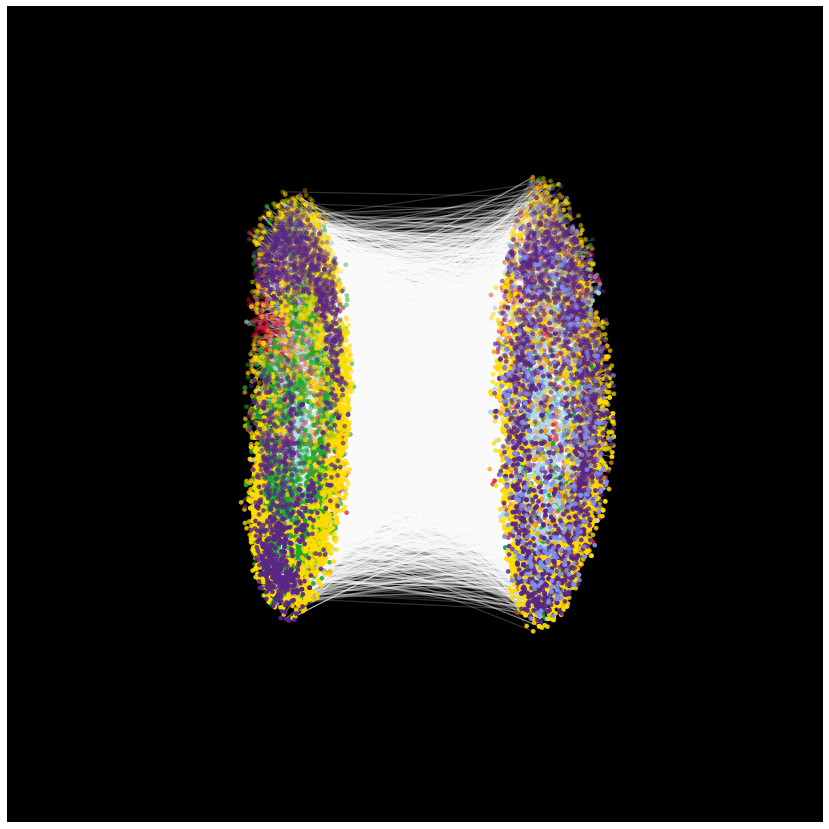

In [207]:
# %matplotlib widget
%matplotlib inline
colormap = [
    "#5A2686",
    "#DC143C",
    "#FFDD00",
    "#FFA500",
    "#ADD8E6",
    "#1AAB27",
    "#7F90F0",
    "#CD5C5C",
    "#8B0000",
    "#CD5C5C",
    "#7F90F0",
]
elev = 60
azim = 90
s = 20
# cell_type=slice_A_sub.obs['Annotation_1_cell_type'].cat.categories[6]
cell_type_layer = 'Annotation_2_tissue'
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    ax.scatter(500+align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
for i in range(align_model_A.obsm['align_spatial'].shape[0]):
    max_index = np.argmax(KLGeneAssignmentMat[:,i])
    ax.plot([align_model_A.obsm['align_spatial'][i,0],align_model_B.obsm['align_spatial'][max_index,0] + 500],[align_model_A.obsm['align_spatial'][i,1],align_model_B.obsm['align_spatial'][max_index,1]],[align_model_A.obsm['align_spatial'][i,2],align_model_B.obsm['align_spatial'][max_index,2]],'w-',alpha=0.2)
# ax.set_zlim([-100,100])
# ax.set_xlim([-150,700])
# ax.set_ylim([-150,150])
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax+500])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('black')

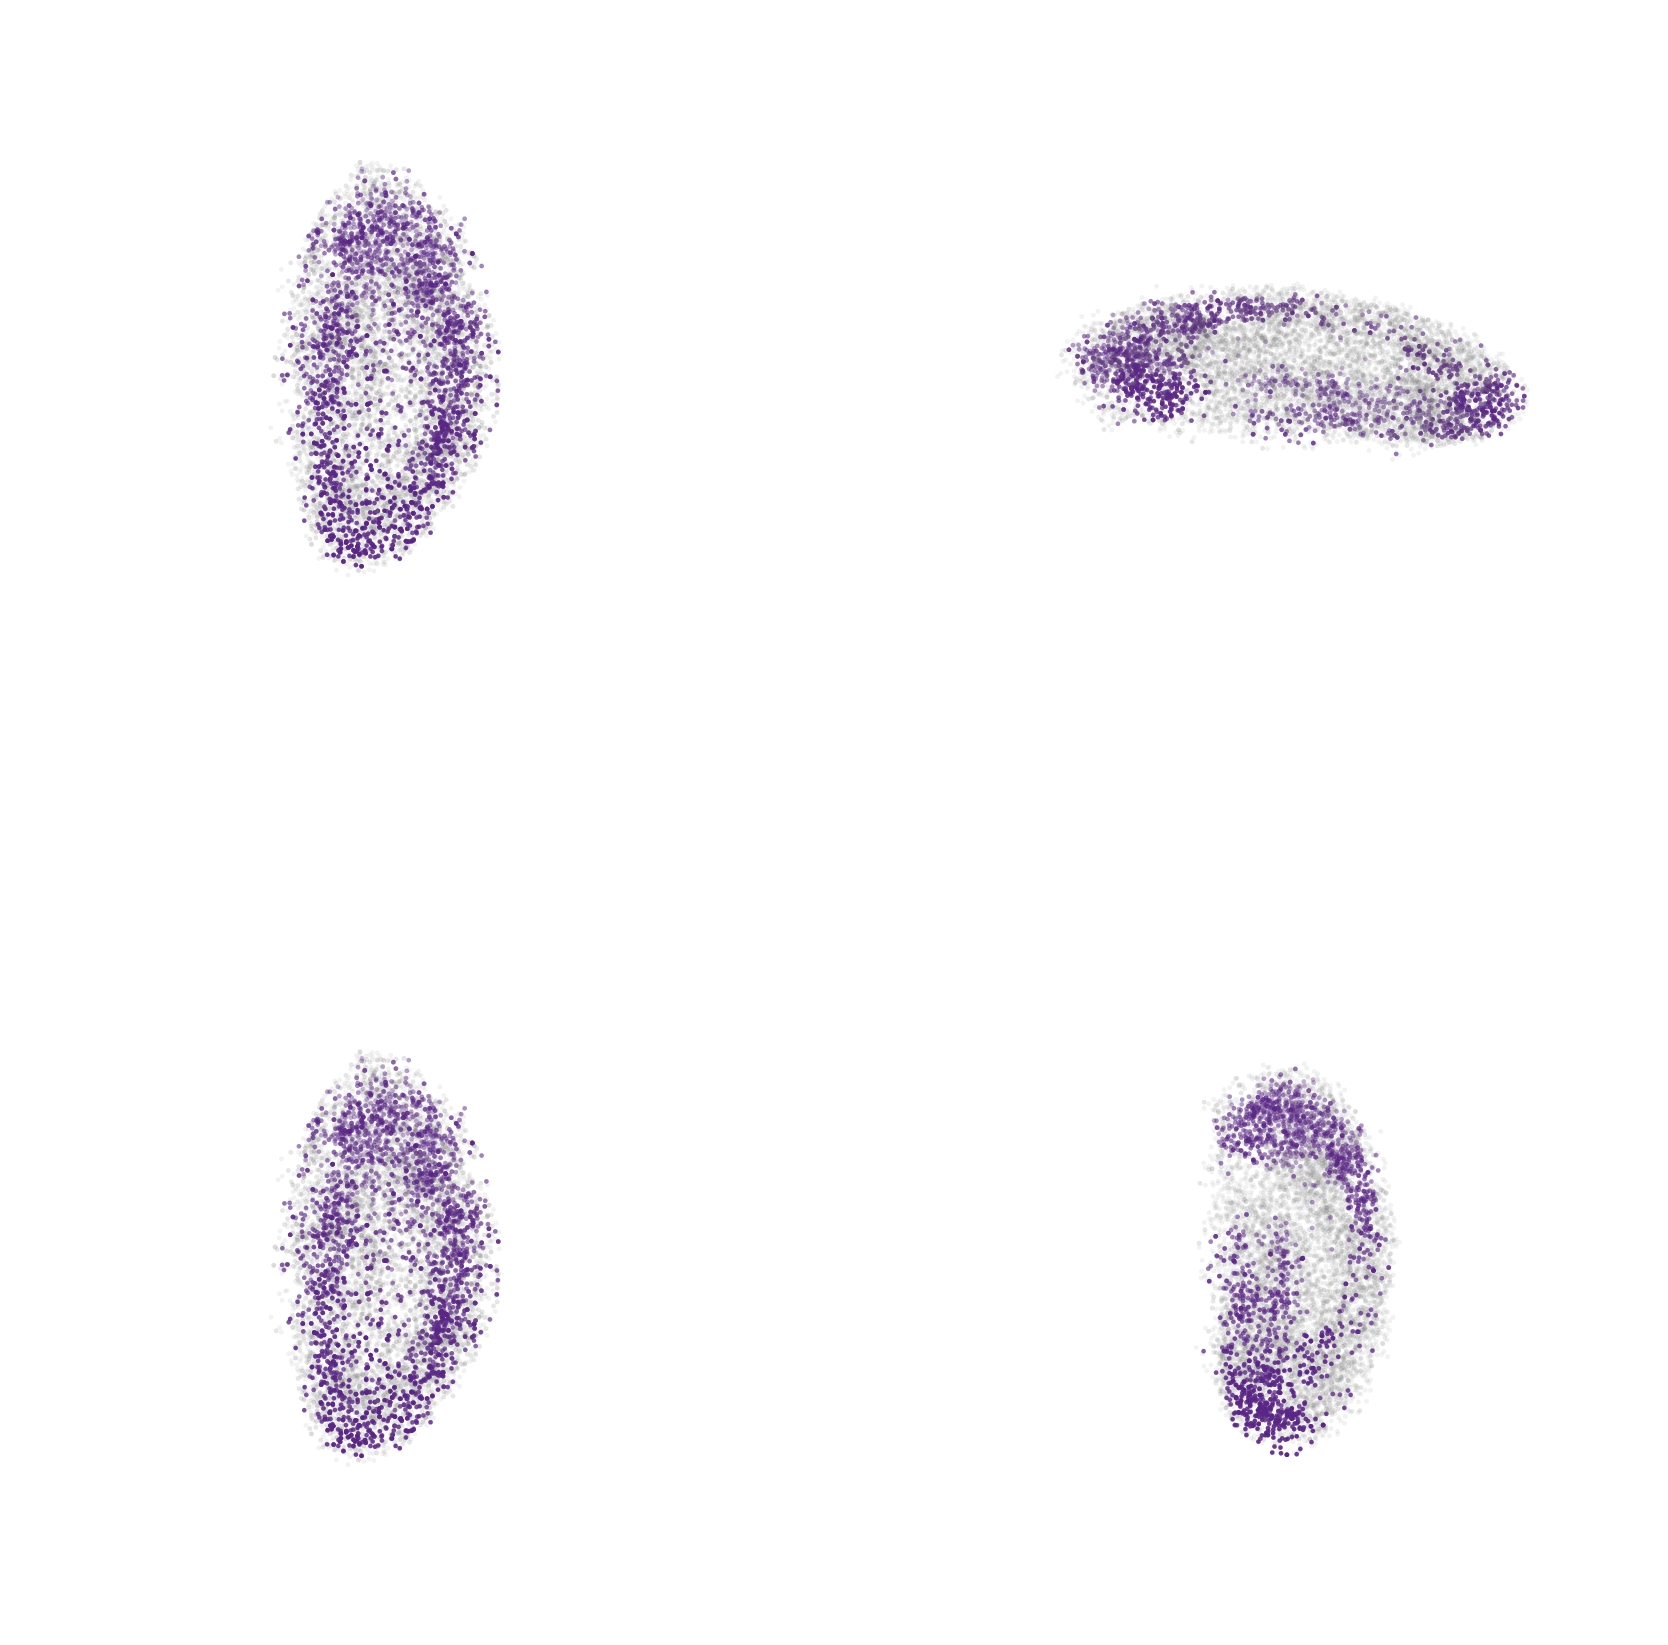

In [208]:
# %matplotlib widget
spatial_key="tdr_spatial"
key_added="align_spatial"
%matplotlib inline
colormap = [
    "#5A2686",
    "#DC143C",
    "#FFDD00",
    "#FFA500",
    "#ADD8E6",
    "#1AAB27",
    "#7F90F0",
    "#CD5C5C",
    "#8B0000",
    "#CD5C5C",
    "#7F90F0",
]
elev = 60
azim = 90
s = 20
xmin, xmax = -250,250
ymin,ymax = -250,250
zmin,zmax = -250,250
select_index
cell_type_plot=slice_A_sub.obs['Annotation_2_tissue'].cat.categories[0]
cell_type_layer = 'Annotation_2_tissue'
fig = plt.figure(figsize=(30,30),facecolor='white')
ax = fig.add_subplot(2,2,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(2,2,2,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')

ax = fig.add_subplot(2,2,3,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(2,2,4,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')


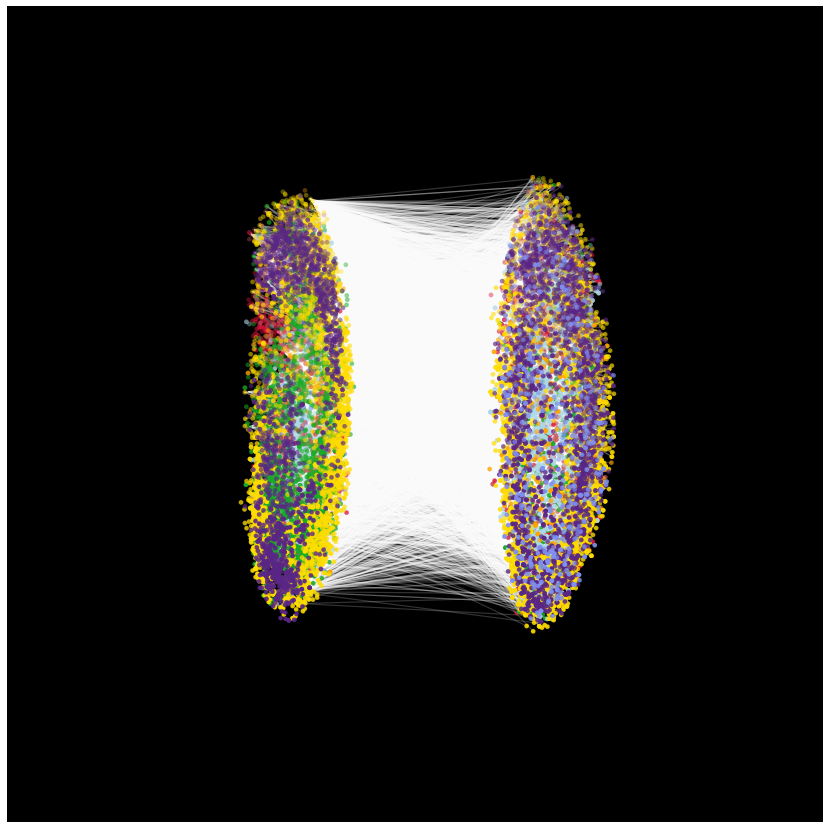

In [209]:
# %matplotlib widget
%matplotlib inline
colormap = [
    "#5A2686",
    "#DC143C",
    "#FFDD00",
    "#FFA500",
    "#ADD8E6",
    "#1AAB27",
    "#7F90F0",
    "#CD5C5C",
    "#8B0000",
    "#CD5C5C",
    "#7F90F0",
]
elev = 60
azim = 90
s = 20
# cell_type=slice_A_sub.obs['Annotation_1_cell_type'].cat.categories[6]
cell_type_layer = 'Annotation_2_tissue'
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    ax.scatter(500+align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
for i in range(align_model_A.obsm['align_spatial'].shape[0]):
    max_index = np.argmax(P[:,i])
    ax.plot([align_model_A.obsm['align_spatial'][i,0],align_model_B.obsm['align_spatial'][max_index,0] + 500],[align_model_A.obsm['align_spatial'][i,1],align_model_B.obsm['align_spatial'][max_index,1]],[align_model_A.obsm['align_spatial'][i,2],align_model_B.obsm['align_spatial'][max_index,2]],'w-',alpha=0.2)
# ax.set_zlim([-100,100])
# ax.set_xlim([-150,700])
# ax.set_ylim([-150,150])
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax+500])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('black')